# Linear Regression

**a) Run a simple linear regression for Salary with one predictor variable: Years Worked**

In [111]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [112]:
df = pd.read_csv('salary.csv', delimiter=',')
df.dropna(inplace=True)

y = pd.DataFrame(df.salary)
X = pd.DataFrame(df.yearsworked)

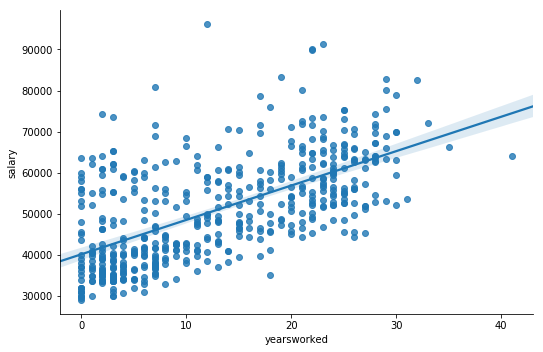

In [113]:
sns.pairplot(df, x_vars=['yearsworked'], y_vars='salary', height=5, aspect=1.5, kind='reg')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

**i) What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?**

In [116]:
r2 = round(model.rsquared * 100)
print(str(r2) + '% of variance in employees’ salaries is accounted for by the number of years they have worked.')

76.0% of variance in employees’ salaries is accounted for by the number of years they have worked.


**ii) Does the model significantly predict the dependent variable? Report the amount of variance explained (R2) and significance value (p) to support your answer.**

In [117]:
model.pvalues

yearsworked    1.130629e-129
dtype: float64

With a p-value of less than 0.5, the model does significantly predict the dependent variable

**iii) Report and interpret the standard error of the estimate. (Hint: Compare the standard error of the estimate to the standard deviation for Salary, which you would have calculated in Question 1.a)).**

In [134]:
print(model.bse)

yearsworked    79.825771
dtype: float64


A low standard error of the estimate suggests that the dots are closer to the regression line and the estimation is better based on the equation of the line.

**b) i) What does the unstandardized coefficient (B) tell you about the relationship between Years Worked and Salary?**

In [136]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 16 May 2019   Prob (F-statistic):          1.13e-129
Time:                        21:45:05   Log-Likelihood:                -4744.5
No. Observations:                 410   AIC:                             9491.
Df Residuals:                     409   BIC:                             9495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2891.0138     79.826     36.217      

The unstandardized coefficient represents the slope of the line between the predictor variable and the dependent variable. This means for every one unit increase in years worked, the salary increases by 2891.01.

**ii) Compare the standardised coefficient (Beta) for Years Worked to the Pearson’s (zero-order) correlation coefficient from question 1.c). What do you notice? Explain why this is so.**

In [137]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


Both the standardised coefficient and the Pearson’s correlation suggest a positive relationship between years worked and salary

**iii) Calculate the expected salary for someone with 12 years’ work experience.**

In [126]:
t = pd.DataFrame({'yearsworked': [12]})

model.predict(t)

0    34692.165236
dtype: float64

**iv) Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?**

In [132]:
s = pd.DataFrame({'yearsworked': [80]})

model.predict(s)

0    231281.101571
dtype: float64

**c) We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?**

Other employee characteristics might influence salary are:

 1. Qualification (Degree)
 2. Position
 3. Field
 4. Gender